In [218]:
import tree_problem_0 as tree

# Do this so that I can update the import file and then run this cell again so it updates here
import imp 
imp.reload(tree)

import matplotlib.pyplot as plt

## Background Information
A polygenic trait is one that is controlled by poly-genes (many genes). Unlike Mendel's pea plants, which were special in that many of their traits were controlled by single genes; in many cases, traits are controlled by many genes - sometimes hundreds or thousands. In these cases, each gene is somewhat like a coin flip (although with varying levels of influence on the trait) and could either have a positive or negative effect on the trait. Note that this assumes that the trait is one dimensional in some way, which isn't always the case. 

Take height for example: there are about 700 genes that influence human height, each of which may have a positive or negative effect. The result in the population is a Gaussian distribution of height, just like the distribution that would be obtained from flipping a coin 700 times and recording the number of heads minus the number of tails. You would get a normal distribution, most often getting a relatively even number of heads and tails, but sometimes getting a much larger number of heads or tails. 

This whole project started by trying to answer the question: Consider the tallest one fifth of trees in a forest. 
Are more of them the offspring of the previous generation's tallest one fifth or shorter four fifths? While tall 
trees are more likely to have tall offspring, there are way more average trees than tall trees. So which is it?

Presumeably, one could answer the question exactly by making a normal distribution for the parent distribution and 
simulating offspring distributions from the parent distribution. This is what I've done and I explain it in this notebook. It turns out that there's many other interesting questions that one can answer with these mathematical structures. (And more that I haven't explored yet but hope to add to this notebook soon.)

I should note that I didn't immediately turn to making a simulation, I tried to solve the problem with calculus but 
the integral was totally impossible, even Mathematica couldn't handle it. I'll try to post pictures of the 
math-attempt on the Github repository soon. 

In [219]:
# Set the global variables, these will be explained
number_of_iterations = 500 # this number is related to the number of operations - if slow, then reduce this
z_range = 8
r = 0.5 # mean regression coefficient
r_s = 0.9 # standard deviation regression coefficient
mean_gen = 0
sd_gen = 1
k_val = -2
percent_step = 0.33

# plotting
fig_size = (12, 8)

Let's make a distribution of the parent generation population for the polygenic trait. We're using the classic mean of zero and standard deviaiton of 1, which you can see in mean_gen and sd_gen. But we could've chosen any mean and sd 
and it would've worked. The distribution is drawn using the equation for a normal distribution.

There are number_of_iterations number of points in the distribution and the distribtution has a total z-score range 
of z_range.

In [220]:
n_iterations = 100 # Make n_iterations small for demonstration purposes

parent_distribution_dem = tree.normal_distribution(n_iterations, z_range, mean_gen, sd_gen)

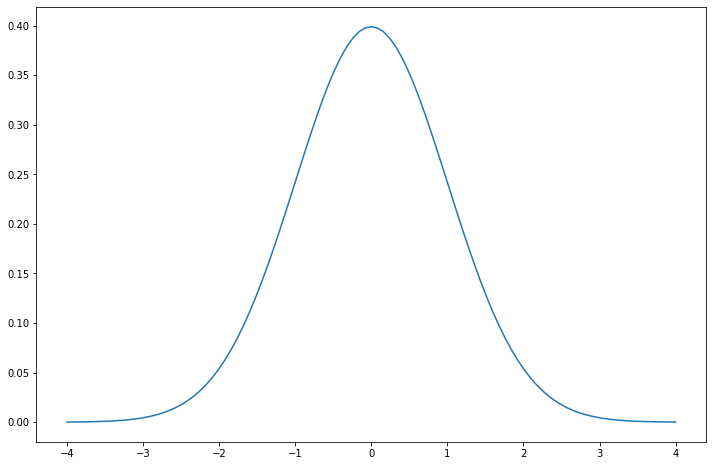

In [221]:
plt.figure(figsize=fig_size)
tree.plot_distribution(parent_distribution_dem)

# This is a plot of the distribution of the polygenic trait for the parent population. 
# We call this the parent distribution. 

Let's imagine that the parent (or average between the two parents) z-score is 1.
If those parents, with a mean of z-score 1 for the trait, had a theoretical distribution of offspring, what would
the mean of that offspring distribution be? Would it be the same as the parent_mean (1)? Or would it be the same as
the population_mean (0)? Or neither?

Let's suppose it's the same as the parent_mean, here's what that would look like. 

In [222]:
parent_z_score = 1
# Convert this to an index number using the function
parent_index = tree.z_score_to_index(parent_z_score, n_iterations, z_range)

# Make a single offspring for that parent with mean reg_coefficient of 1
single_offspring_distribution1 = tree.one_offspring_distribution(parent_distribution_dem, parent_index, 1, r_s)

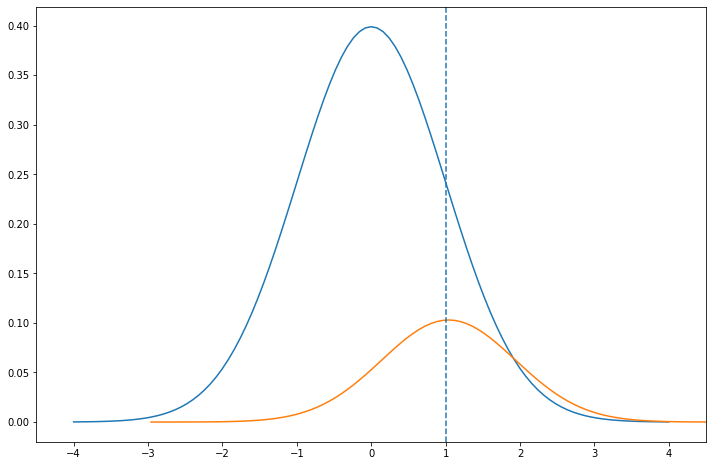

In [224]:
plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution_dem)
tree.plot_distribution(single_offspring_distribution1)
plt.axvline(x=1, linestyle='--')

# In this plot, the parent_mean z-score is denoted with the blue dashed line. And the theoretical offspring 
# distribution of that parent is denoted in orange. There's no regression towards the mean, because the 
# parent_mean = offspring_mean.

However, this is not how nature works. In reality, there is always regression towards the mean. And the regression has what's called a regression coefficent. Last time the regression coefficient was 1, indicating a perfect correlation between the parent and offspring for the trait. More realistically, the regression coefficient is around 0.5. Here we use 0.5 as the mean regression coefficient. (We call it the mean regression coefficient because it's the regression coefficient between the parent_mean and its theoretical offspring distribution mean.)

In [227]:
single_offspring_distribution2 = tree.one_offspring_distribution(parent_distribution_dem, parent_index, 0.5, r_s)

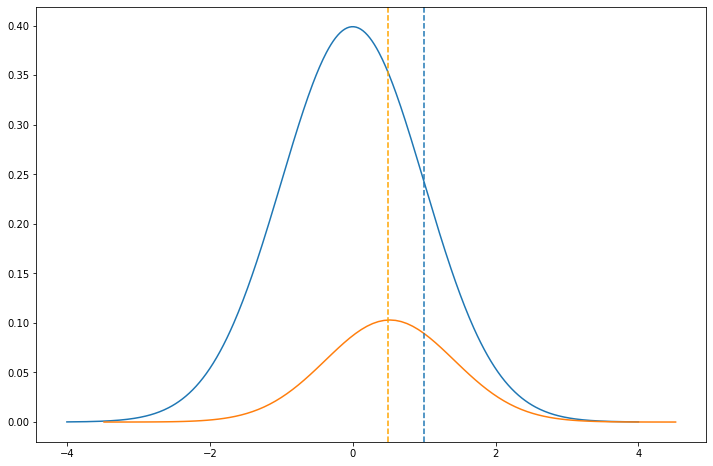

In [228]:
plt.figure(figsize=fig_size)
tree.plot_distribution(parent_distribution)
tree.plot_distribution(single_offspring_distribution2)
plt.axvline(x=1, linestyle='--')
plt.axvline(x=0.5, color='orange', linestyle='--')

# In this plot, the parent_mean is denoted with the blue dashed line and the parent distribution is shown in blue. 
# The offspring_mean is denoted with the orange dashed line, and the theoretical offspring distribution is shown in 
# orange. Clearly, there's a correlation between parent and offspring, but it's not perfect. 

If the mean regression coefficient was 0, that would indicate no correlation between the parent and offspring for the trait, and the offspring_mean would be the same as the population_mean. But this would mean there's no inheritance and no correlation between parent and offspring, which is of course not the case. 

We've been talking about the mean regression coefficient, that is - the ratio of the offspring_mean z_score to the parent_mean z_score. There may also be a standard deviation regression coefficient, which is the ratio of an offspring distribution standard deviation to the population standard deviation. That is, if parents have a large number of offspring, is the standard deviation among their offspring the same as the standard deviation among the population for that trait? It's hard to imagine that those parents' offspring would be more spread out than the population as a whole, and so it seems unlikely that the standard deviation regression coefficient is greater than 1. However, it may be 1 or less than 1. Efforts to look up what the standard deviation regression coefficient is for any example trait yieled no results. Although the mean regression coefficient is well understood. 

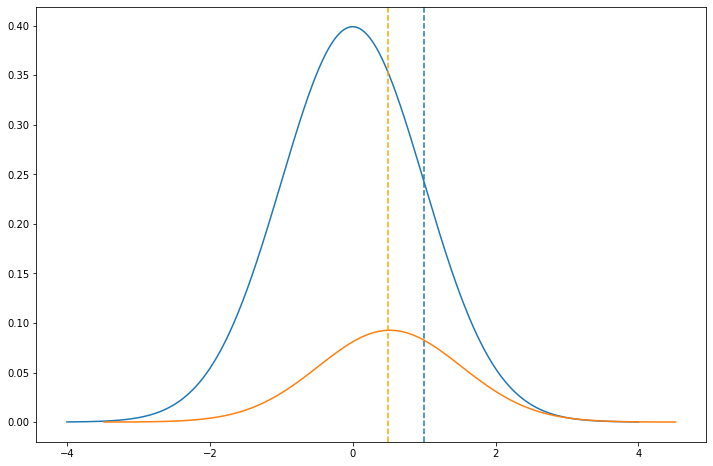

In [233]:
single_offspring_distribution3 = tree.one_offspring_distribution(parent_distribution_dem, parent_index, 0.5, 1)

plt.figure(figsize=fig_size)
tree.plot_distribution(parent_distribution)
tree.plot_distribution(single_offspring_distribution3)
plt.axvline(x=1, linestyle='--')
plt.axvline(x=0.5, color='orange', linestyle='--')

# Here the offspring distribution has the same standard deviation as the population at large, as the standard 
# deviation regression coefficient is 1. 

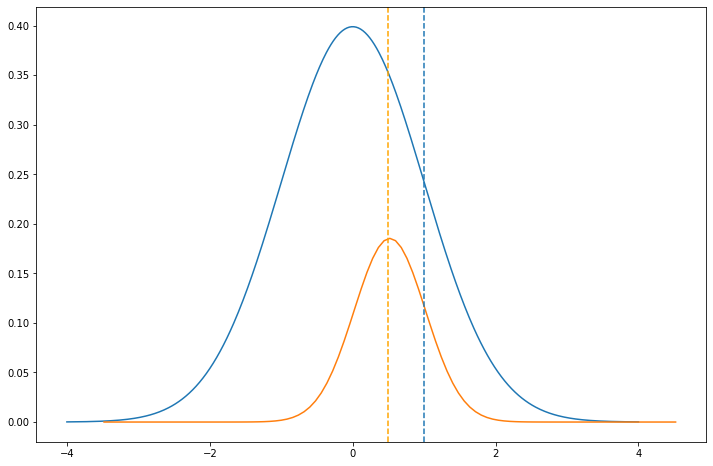

In [234]:
single_offspring_distribution4 = tree.one_offspring_distribution(parent_distribution_dem, parent_index, 0.5, 0.5)

plt.figure(figsize=fig_size)
tree.plot_distribution(parent_distribution)
tree.plot_distribution(single_offspring_distribution4)
plt.axvline(x=1, linestyle='--')
plt.axvline(x=0.5, color='orange', linestyle='--')

# And here the offspring distribution has a standard deviation that's one half the population standard deviation, as 
# the standard deviation regression coefficient is 0.5. 
# You can see it's much less spread out. 

With the mean and standard deviation regression coefficients, we now have everything we need to simulate offspring 
distributions. 

Let's now make an offspring distribution for each of the parents in the parent_distribution, not just the parents 
(or average between the parents) at z_score = 1.
Note that there are number_of_iterations number of parents and thus there are the same number of offspring
distributions.

In [181]:
offspring_distributions_ = tree.offspring_distributions(parent_distribution, r, r_s)

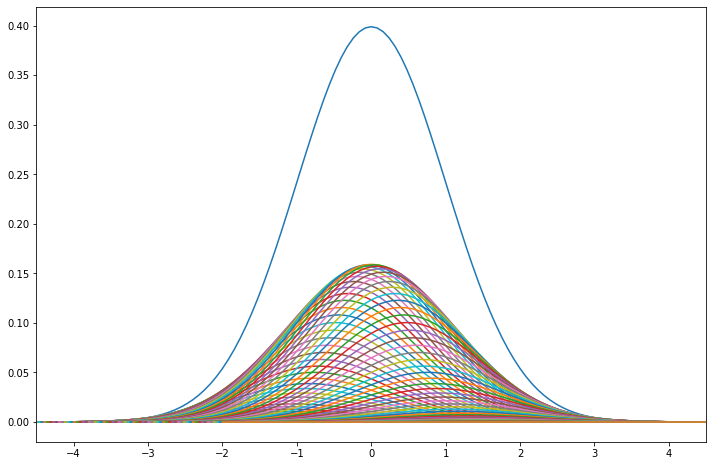

In [202]:
plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution) # plot the parent distribution
tree.plot_distributions(offspring_distributions_) # plot the offspring distributions

# In this plot, the offspring distributions are shown along with the parent distribution (in blue)
# You can see that the offspring distributions can be summed up to form a normal distribution of their own, as
# expected.

In [214]:
# Let's redefine the parent distribution with the normal number of iterations to make things more accurate
parent_distribution = tree.normal_distribution(number_of_iterations, z_range, mean_gen, sd_gen)

In [ ]:
# We can sum up all the offspring distributions and normalize it to the parent_distribution area (and parent
# increment)

total_offspring_distribution = tree.final_superimposed_distribution_all_area_adj(parent_distribution, r, r_s)

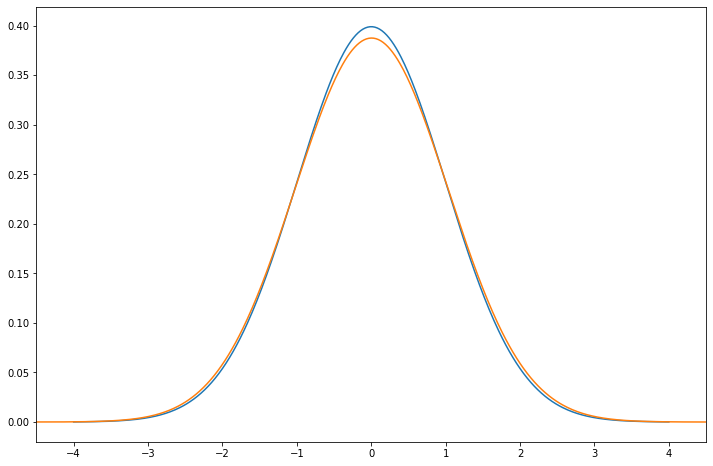

In [217]:
plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution) # plot the parent distribution
tree.plot_distribution(total_offspring_distribution) # plot the total offspring distribution

# In this plot, the parent distribution is shown in blue and sum of the offspring distributions, representing the 
# total offspring distribution is shown in orange. The total offspring distribution is a little more spread out 
# than the total parent distribution. We're 'r' and 'r_s' for the mean and standard deviation correlation
# coefficients, respectively.

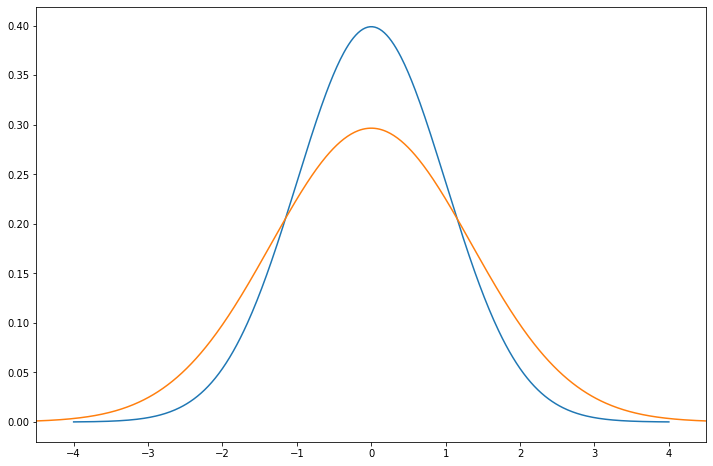

In [237]:
total_offspring_distribution1 = tree.final_superimposed_distribution_all_area_adj(parent_distribution, 1, r_s)

plt.figure(figsize=fig_size)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution) # plot the parent distribution
tree.plot_distribution(total_offspring_distribution1) # plot the total offspring distribution

# This is the same as the last plot, except there's no regression to the mean (the mean regression coefficient is 1)
# Clearly, the offspring population is much more spread out than the parent population, and if this continued, 
# successive generations would be increasingly spread out. This is why there must be regression to the mean to 
# maintain a stable population distribution. 

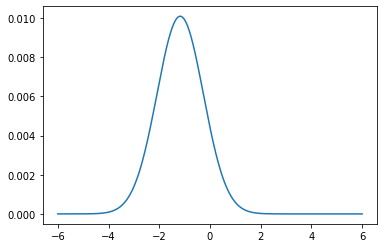

In [239]:
tree.plot_distribution(tree.final_superimposed_distribution(parent_distribution, r, r_s, below_k_v_p=k_val))